In [1]:
import numpy as np
from torchvision import datasets
from sklearn import linear_model
from utils import *
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
from base import BaseObjective
from modules import *
from PIL import Image
from sklearn.manifold import TSNE
# Load the .npy file
testset = np.load('data/cifar10_test_embeddings.npy')
trainset = np.load('data/cifar10_train_embeddings.npy')

# Load the CIFAR-10 dataset
cifar10_train = datasets.CIFAR10(root='data', train=True, download=True)
cifar10_test = datasets.CIFAR10(root='data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
labels = np.array(cifar10_train.targets)

In [3]:
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(trainset)

/user/cs.aau.dk/em63by/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/user/cs.aau.dk/em63by/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [7]:
len(embeddings_tsne[0])

2

In [36]:
import pandas as pd
df=pd.DataFrame({'x1':embeddings_tsne[:,0], "x2":embeddings_tsne[:,1], "y": labels })

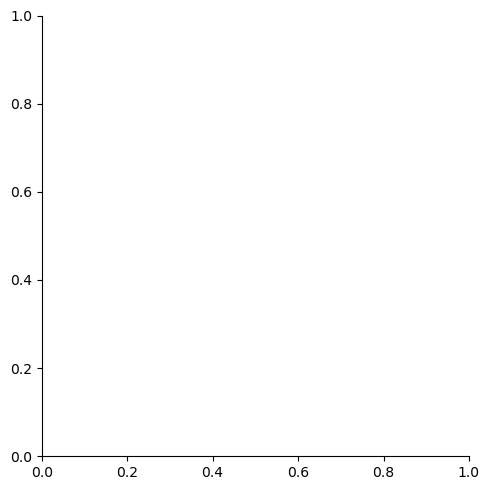

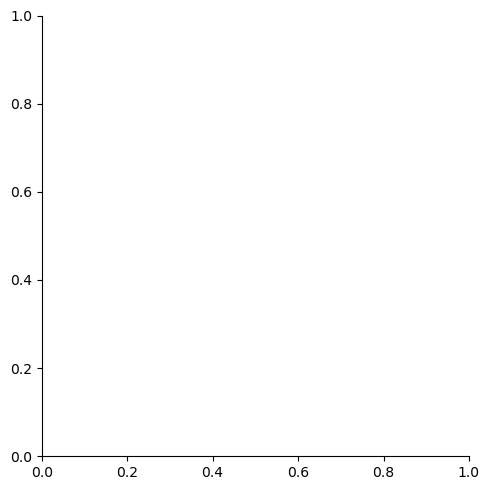

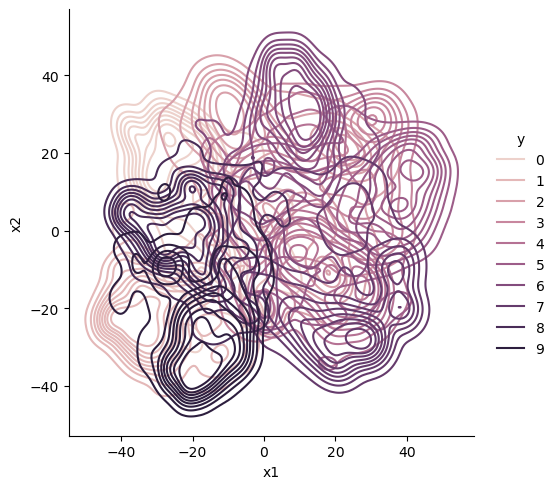

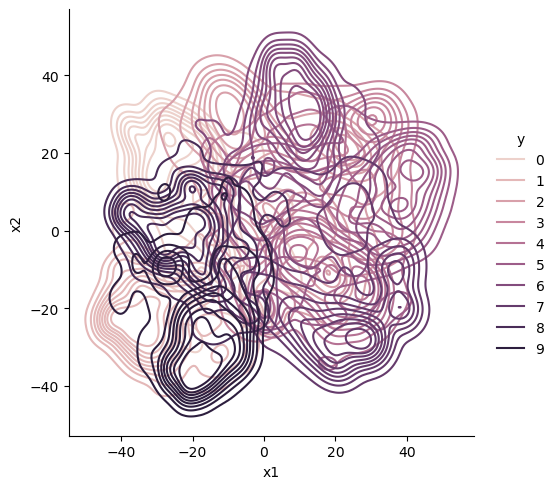

In [38]:
import seaborn as sns
sns.set_palette("bright")
sns.displot(df, x="x1",  y="x2", hue="y", kind='kde')  
plt.show()

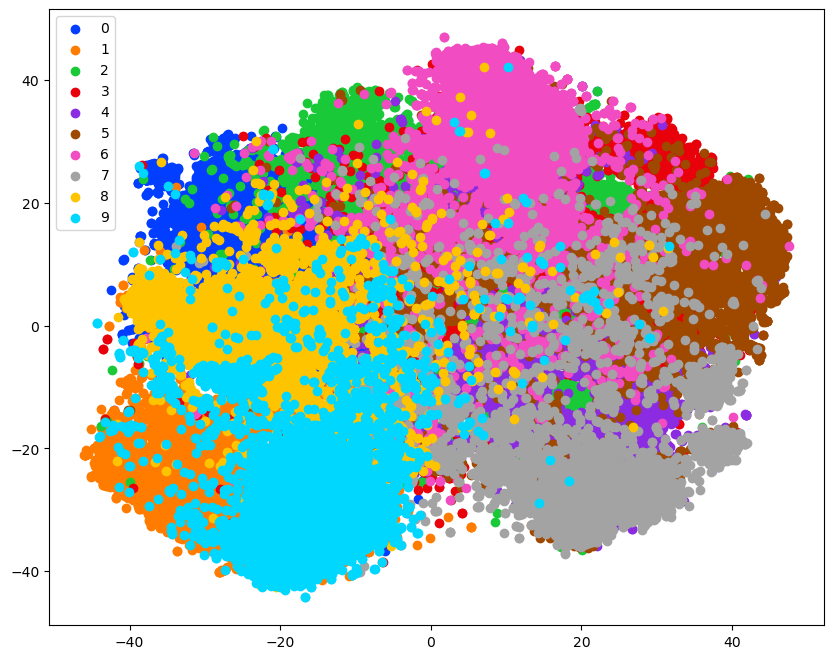

In [41]:
plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    indices = labels == label
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], label=label)
plt.legend()
plt.show()

In [42]:
from sklearn.cluster import KMeans
# Create a K-means clustering model with 10 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-means model to the embeddings
kmeans.fit(trainset)

# Get the predicted cluster labels
cluster_labels = kmeans.labels_

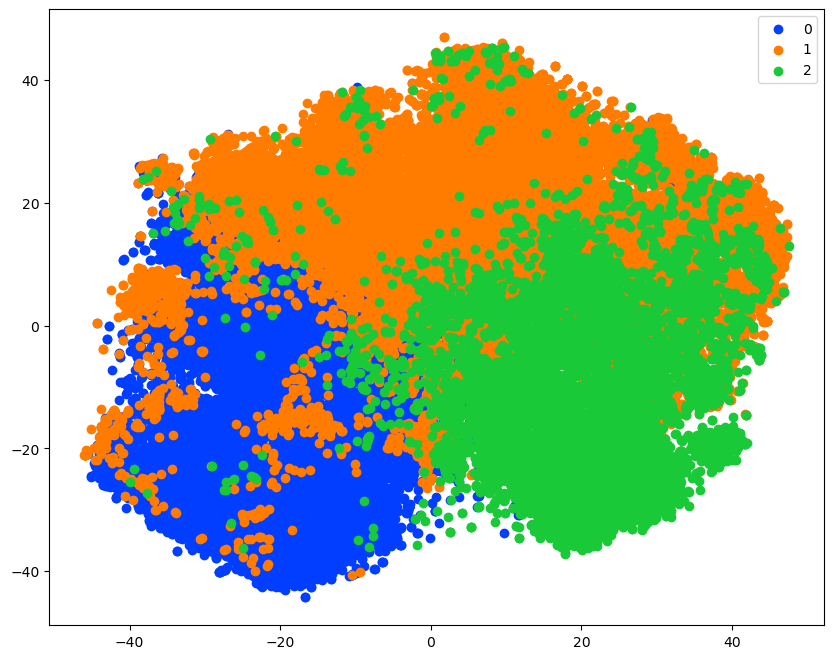

In [43]:
plt.figure(figsize=(10, 8))
for label in np.unique(cluster_labels):
    indices = cluster_labels == label
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], label=label)
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Assuming 'embeddings' is your array of embeddings
# Assuming 'labels' is the array of original CIFAR-10 labels
# Assuming 'cluster_labels' is the array of cluster labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainset, labels, test_size=0.2, random_state=42)

# Split the data with cluster labels into training and testing sets
X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(trainset, cluster_labels, test_size=0.2, random_state=42)


In [16]:
from sklearn.svm import SVC

# Assuming 'X_train' and 'y_train' are the training data with original labels

# Create and train the first model
model_1 = SVC()
model_1.fit(X_train, y_train)

# Assuming 'X_cluster_train' and 'y_cluster_train' are the training data with cluster labels

# Create and train the second model
model_2 = SVC()
model_2.fit(X_cluster_train, y_cluster_train)


SVC()

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X_test' and 'y_test' are the test data with original labels
# Assuming 'X_cluster_test' and 'y_cluster_test' are the test data with cluster labels

# Evaluate the first model with original labels
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
classification_report_1 = classification_report(y_test, y_pred_1)

# Evaluate the second model with cluster labels
y_pred_2 = model_2.predict(X_cluster_test)
accuracy_2 = accuracy_score(y_cluster_test, y_pred_2)
classification_report_2 = classification_report(y_cluster_test, y_pred_2)

# Print the results
print("Performance of Model 1 (Original Labels):")
print("Accuracy:", accuracy_1)
print("Classification Report:\n", classification_report_1)
print()

print("Performance of Model 2 (Cluster Labels):")
print("Accuracy:", accuracy_2)
print("Classification Report:\n", classification_report_2)


Performance of Model 1 (Original Labels):
Accuracy: 0.8367
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       973
           1       0.92      0.90      0.91       979
           2       0.85      0.76      0.80      1030
           3       0.68      0.75      0.71      1023
           4       0.79      0.80      0.80       933
           5       0.82      0.76      0.79      1015
           6       0.84      0.87      0.86       996
           7       0.87      0.85      0.86       994
           8       0.89      0.90      0.90      1017
           9       0.88      0.88      0.88      1040

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Performance of Model 2 (Cluster Labels):
Accuracy: 0.9617
Classification Report:
               precision    recall  f1-score   support

           0       0